In [116]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.feature_selection import SequentialFeatureSelector




from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import *

# Data import

In [2]:
df_raw = pd.read_csv('hw3_labeled.csv')
display(df_raw.head())
print(df_raw.info())
print(df_raw.shape)

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing,HasAlley,HasMiscFeature
0,84b6b8402,1-STORY 1946+,RL,85,8500,0,Lvl,Inside,0,NAmes,...,1,0,0,0,0,0,0,0,0,0
1,a2f423bff,2-STORY 1946+,FV,65,8125,0,Lvl,Inside,0,Somerst,...,0,0,0,0,0,0,0,0,0,0
2,065cc61df,2-STORY 1946+,RL,89,11645,1,Lvl,Corner,0,CollgCr,...,0,0,0,0,0,0,0,0,0,0
3,7c8d49f4d,2-STORY PUD 1946+,FV,24,2572,0,Lvl,FR2,0,Somerst,...,0,1,0,0,0,0,0,0,0,0
4,086b67ab7,2-STORY 1945-,RL,79,9480,0,Lvl,Inside,0,NAmes,...,0,1,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                700 non-null    object
 1   MSSubClass        700 non-null    object
 2   MSZoning          700 non-null    object
 3   LotFrontage       700 non-null    int64 
 4   LotArea           700 non-null    int64 
 5   LotShape          700 non-null    int64 
 6   LandContour       700 non-null    object
 7   LotConfig         700 non-null    object
 8   LandSlope         700 non-null    int64 
 9   Neighborhood      700 non-null    object
 10  BldgType          700 non-null    object
 11  HouseStyle        700 non-null    object
 12  OverallQual       700 non-null    int64 
 13  OverallCond       700 non-null    int64 
 14  YearBuilt         700 non-null    int64 
 15  YearRemodAdd      700 non-null    int64 
 16  RoofStyle         700 non-null    object
 17  RoofMatl        

# Data Cleaning

In [3]:
# Checking the number of unique variabels 
features = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType',
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating',
            'GarageType', 'SaleType', 'SaleCondition']

#----------------------------------------------------------------------------------------------------
df = df_raw.copy()

for i in features:
    print(i,':',len(df[i].unique()))

MSSubClass : 15
MSZoning : 5
LandContour : 4
LotConfig : 5
Neighborhood : 25
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 6
MasVnrType : 4
Foundation : 6
Heating : 4
GarageType : 1
SaleType : 8
SaleCondition : 6


In [4]:
# dummies 
df = df_raw.copy()
df = pd.get_dummies(df, columns=features)

#----------------------------------------------------------------------------------------------------
# Cleaning up months to number 
def monthToNum(shortMonth):
    return {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'Aug': 8,
            'Sept': 9, 
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
    }[shortMonth]

df['MoSold'] = df['MoSold'].apply(monthToNum)

#----------------------------------------------------------------------------------------------------
# Dropping the id column 
df = df.drop('ID', axis=1)


df

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,85,8500,0,0,5,3,1961,1961,203,3,...,0,0,0,1,1,0,0,0,0,0
1,65,8125,0,0,7,5,2005,2006,0,4,...,0,0,1,0,0,0,0,0,0,1
2,89,11645,1,0,7,5,2004,2004,0,4,...,0,0,0,1,0,0,0,0,1,0
3,24,2572,0,0,7,5,1999,1999,0,4,...,0,0,0,1,0,0,0,0,1,0
4,79,9480,0,0,5,7,1942,1995,224,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,71,8197,0,0,6,5,1977,1977,148,3,...,0,0,0,1,0,0,0,0,1,0
696,65,8775,0,0,5,5,1994,1994,0,3,...,0,0,0,1,0,0,0,0,1,0
697,60,6000,0,1,4,4,1953,1953,0,2,...,0,0,0,1,0,0,0,0,1,0
698,69,9588,1,0,8,5,2007,2007,270,4,...,0,0,1,0,0,0,0,0,0,1


# Functions to make working easier

In [5]:
def data_generation(df, features):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp['SalePrice']
    X = df_temp.drop('SalePrice', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])

# Performance of linear models

Since this question is about the prediction of the value of the property give some factors, i believe that this is actually a linear problem.

In [12]:
features = df.columns
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)

temp = []
models = []
models.append(('OLS', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))

#--------------------------------------------------------------------------------------------------
# Checking the performance of Linear models 

for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='neg_mean_squared_error',
                                 n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean())])

# Create dataframe and sort by the MSE performance 
mdl_performance = pd.DataFrame(temp, columns=['model', 'MSE'])
mdl_performance = mdl_performance.sort_values('MSE', ascending=True)
mdl_performance

,model,MSE
2,Ridge,1.627361e+09
1,Lasso,2.032845e+09
0,OLS,1.728140e+33


As we can see, the OLS performance is very bad. This is because the number of covariates is very large relative to the size of the training data. This means that there is a significant risk of overfitting. Thus OLS should not be used. 

As we can see, ridge regression performs the best. However, I believe that with some tuning, Lasso is better due to its ability to provide sparse solutions. This is ultimately done to combat overfitting, which is a major concern as the number of covariates is very large.

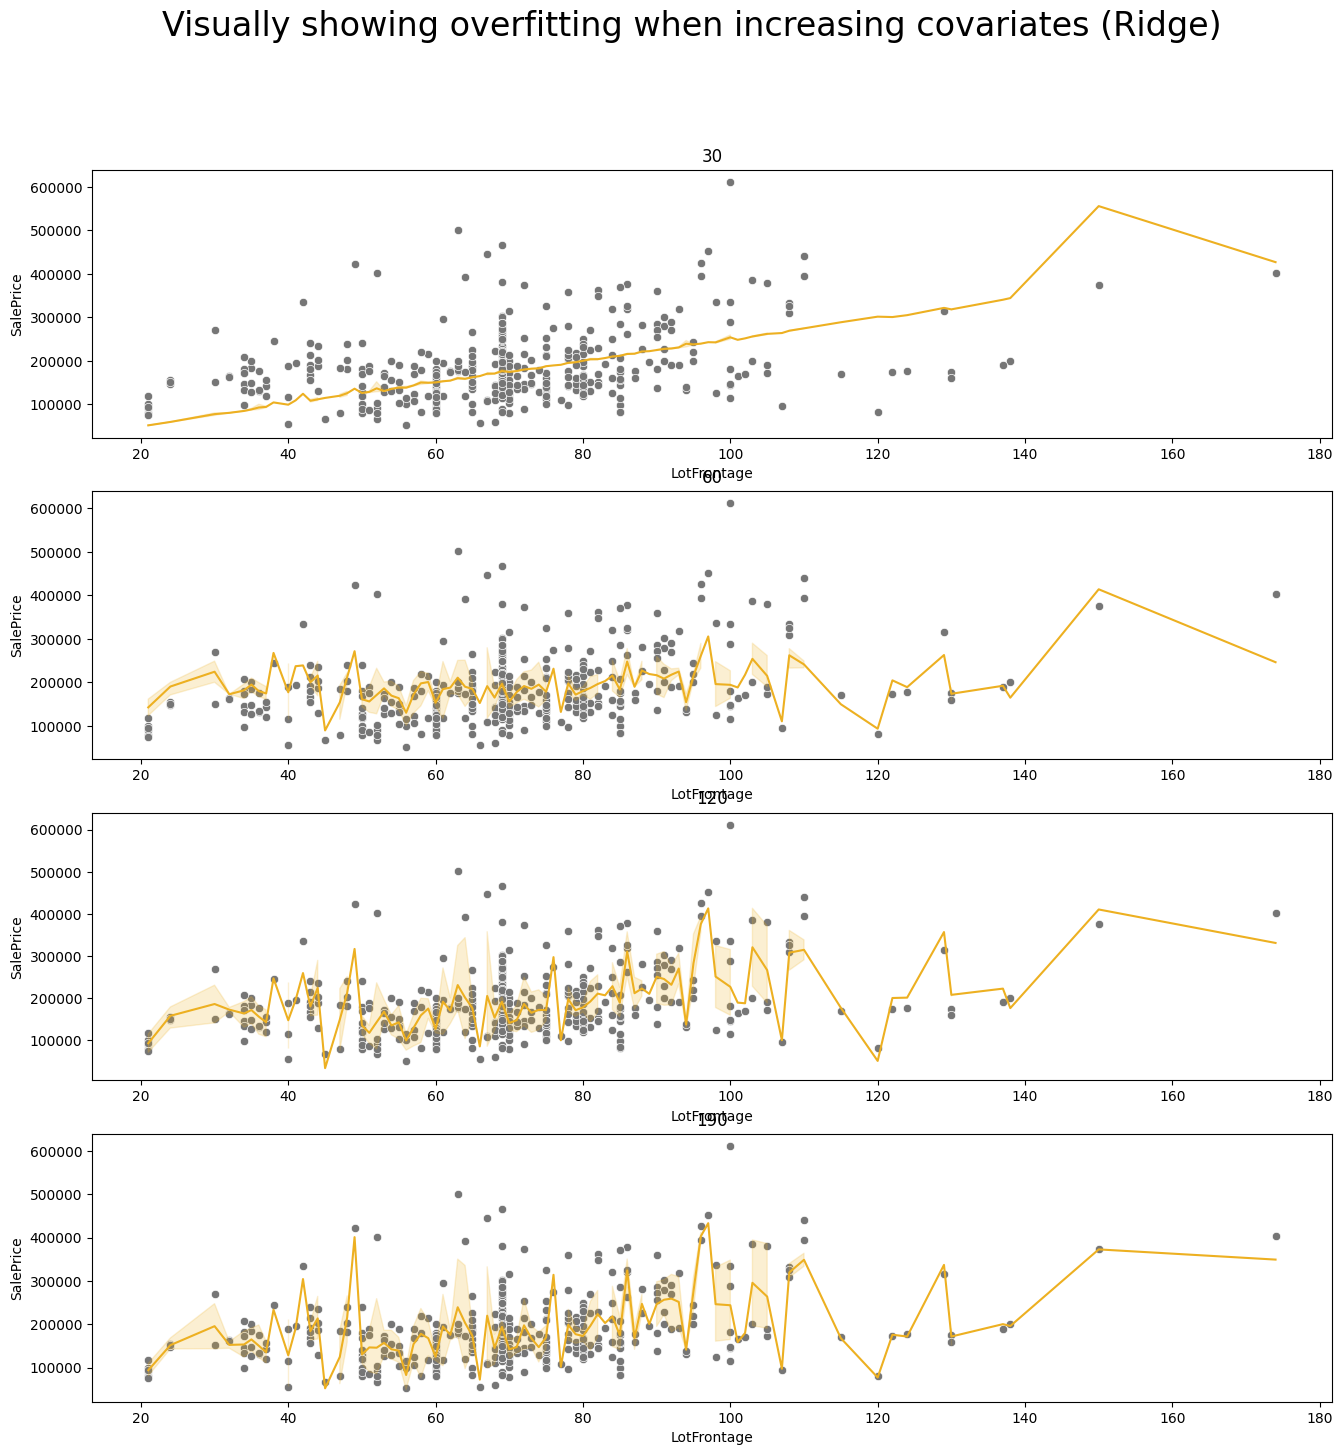

In [114]:
testing = [2, 5, 20, 190]
features = df.columns

fig, axs = plt.subplots(nrows=4, figsize=(16,16))
counter = 0


for i in testing:
    features = df.columns
    features = features.drop('SalePrice')
    slicing = list(features[:i])
    slicing.append('SalePrice')

    X_train, X_test, y_train, y_test = data_generation(df, slicing)
    
    #-------------------------------------------------------------------------------------------
    temp_df = pd.DataFrame(X_train)
    temp_df['SalePrice'] = y_train
    
    mdl = Ridge(fit_intercept = False)
    temp_x = temp_df.drop('SalePrice', axis = 1)
    temp_y = temp_df['SalePrice']
    
    mdl.fit(temp_x, temp_y)
    preds = mdl.predict(temp_x)
    
    sns.scatterplot(x = temp_x.iloc[:,0], y = temp_y, color='#767676', ax=axs[counter])
    sns.lineplot(x = temp_x.iloc[:,0], y = preds, color='#edb021', ax=axs[counter])
    
    counter += 1

#-------------------------------------------------------------------------------------------
axs[0].title.set_text('2')
axs[1].title.set_text('5')
axs[2].title.set_text('20')
axs[3].title.set_text('190')

plt.suptitle('Visually showing overfitting when increasing covariates (Ridge)', fontsize = 24)

plt.show()

These graphs above try to show the how the model will begin to overfit as the number of covariates increasees. This is ultimately why feature selection and regularisation is necessary.

### Training curves

Best Ridge alpha: {'ridge__alpha': 2.5353644939701168}
Best Lasso alpha: {'lasso__alpha': 220.513073990305}




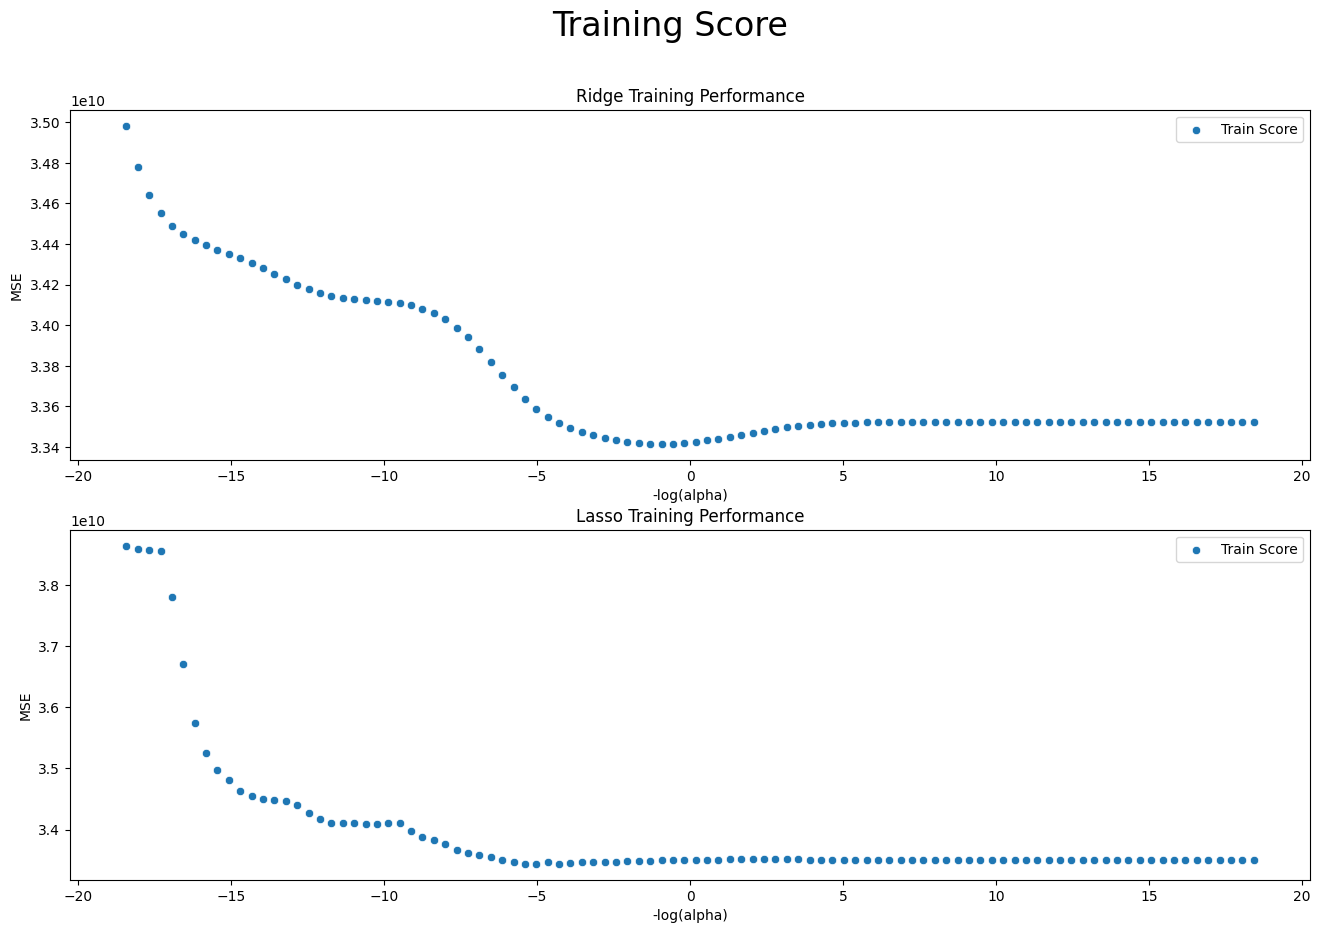

In [18]:
X_train, X_test, y_train, y_test = data_generation(df, features)

#-------------------------------------------------------------------------------------------
pipe_r = Pipeline(steps=[("scaler", StandardScaler()),
                         ("ridge", Ridge(fit_intercept = False))])

ridge_params = {'ridge__alpha':np.logspace(-8,8,100)}

grid_r = GridSearchCV(estimator=pipe_r, param_grid=ridge_params, n_jobs=-1,  cv = 10,
                     scoring = 'neg_mean_squared_error')

grid_r.fit(X_train, y_train)

print(f'Best Ridge alpha: {grid_r.best_params_}')

#--------------------------------------------------------------------------------------------------
pipe_l = Pipeline(steps=[("scaler", StandardScaler()),
                         ("lasso", Lasso(fit_intercept = False))])

lasso_params = {'lasso__alpha':np.logspace(-8,8,100)}

grid_l = GridSearchCV(estimator=pipe_l, param_grid=lasso_params, n_jobs=-1,  cv = 10,
                     scoring = 'neg_mean_squared_error')
grid_l.fit(X_train, y_train)

print(f'Best Lasso alpha: {grid_l.best_params_}')
print('\n')

#--------------------------------------------------------------------------------------------------
# Defining variables 
regressions = [Ridge, Lasso]
fig, axs = plt.subplots(nrows=2, figsize=(16,10))
alpha_list = np.logspace(-8,8,100)

#--------------------------------------------------------------------------------------------------
# Getting the alpha plots for both Lasso and Ridge regression
counter = 0 

for reg in regressions:
    cvResults = []
    
    for cur_alpha in alpha_list:
        clf_cv = Pipeline(steps=[("scaler", StandardScaler(with_std = False)),
                                 ("mdl", reg(cur_alpha, fit_intercept = False))])

        # Perform 10-fold cross validation 
        scores = cross_val_score(estimator = clf_cv, X = X_train, y = y_train, cv = 10, \
                                 scoring = 'neg_mean_squared_error', n_jobs = -1)

        cvResults.append(abs(scores.mean()))
    fig = sns.scatterplot(y = cvResults, x = -np.log(alpha_list),
                          label = "Train Score", ax = axs[counter])
        
    counter += 1

#--------------------------------------------------------------------------------------------------

# Graph
axs[0].title.set_text('Ridge Training Performance')
axs[1].title.set_text('Lasso Training Performance')

axs[0].set(xlabel='-log(alpha)', ylabel='MSE')
axs[1].set(xlabel='-log(alpha)', ylabel='MSE')

plt.suptitle('Training Score', fontsize = 24)
plt.show()

### Methods of feature selection for Lasso 

In [55]:
features = df.columns

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)

#--------------------------------------------------------------------------------------------------
# Sequential feature selection 
lr = Pipeline(steps=[("scaler", StandardScaler()),
                     ("mdl", Lasso())])

sfs = SequentialFeatureSelector(lr, n_jobs=-1, n_features_to_select='auto', 
                               tol=None)
sfs.fit(X_train, y_train)

feature_selection_features = list(X_train.columns[sfs.get_support()])
feature_selection_features.append('SalePrice')

print(f'Features selected: {features}')
print(len(features))

Features selected: ['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'Electrical', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Condition_Feedr', 'Condition_RRNe', 'Condition_PosN', 'Condition_RRAe', 'Condition_Artery', 'Exterior_Wd Sdng', 'Exterior_BrkFace', 'Exterior_HdBoard', 'Exterior_MetalSd', 'Exterior_CBlock', 'Exterior_Stucco', 'Exterior_BrkComm', 'HasAlley', 'HasMiscFeature', 'MSSubClass_1-1/2 STORY FIN', 'MSSubClass_1-1/2 STORY UNF', 'MSSubClass_1-STORY 1946+', 'MSSubClass_1-STORY PUD 1946+', 'MSSubClass_1-STORY W/ ATTIC', 'MSSubClass_DUPLEX', 'MSSubClass_SPLIT FOYER', 'MSZoning_FV', 'MSZoning_RM', 'LandContour_Low', 'LotConfig_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_B

In [113]:
# Doing feature importance using RandomForestClassifier
features = df.columns

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)

#--------------------------------------------------------------------------------------------------
'''Feature importances are provided by the fitted attribute feature_importances_ and they
are computed as the mean and standard deviation of accumulation of the impurity decrease 
within each tree.'''

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Creating dataframe then sorting the features by importance
feature_names = X_train.columns
forest_importances = pd.DataFrame(importances, index=feature_names)
forest_importances = forest_importances.reset_index()
forest_importances = forest_importances.sort_values(0, ascending=False)
forest_importances

,index,0
26,GrLivArea,0.030237
23,1stFlrSF,0.030121
1,LotArea,0.029369
19,TotalBsmtSF,0.029326
41,GarageArea,0.028749
...,...,...
57,Condition_RRNe,0.000000
156,RoofMatl_Roll,0.000000
80,HasMiscFeature,0.000000
75,Exterior_CBlock,0.000000


# Lasso with feature selection 

In [110]:
# Defining hyperparameters to fit 
parameters = {
    'mdl__fit_intercept' : [True, False], 
    'mdl__alpha'       : np.logspace(-10,10,200),
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", Lasso())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -572745163.410389 using {'mdl__alpha': 28.66067616948256, 'mdl__fit_intercept': True}


In [125]:
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance 
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("lasso", Lasso(fit_intercept=True, alpha=28.66067616948256))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('r2: ',r2)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

r2:  0.8722613691115589
MSE:  788205480.940606


# Performance of non-linear models 

In [124]:
features = df.columns
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)


#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('OLS', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))

models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))

models.append(('K Neigbor Classifier', KNeighborsRegressor()))

models.append(('Support Vector Classifier', SVR()))
models.append(('Support Vector Machines', SVR(kernel = 'rbf')))

models.append(('MLP',  MLPRegressor(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostRegressor()))
models.append(('Gradient boosting', GradientBoostingRegressor()))



for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'MSE', 'MSE_std'])
mdl_performance = mdl_performance.sort_values('MSE', ascending=True)
mdl_performance

,model,MSE,MSE_std
10,Gradient boosting,9.134399e+08,1.227660e+07
3,Random Forest,9.788679e+08,3.820874e+07
9,Ada boost,1.169103e+09,5.276039e+07
2,Ridge,1.627361e+09,2.861106e+08
5,K Neigbor Classifier,1.740121e+09,6.864247e+07
1,Lasso,2.032845e+09,2.846795e+08
4,Decision Tree,2.242942e+09,2.528637e+08
6,Support Vector Classifier,6.375974e+09,8.328979e+07
7,Support Vector Machines,6.375974e+09,8.328979e+07
8,MLP,3.425604e+10,6.186016e+08


# Gradient Boosting

In [129]:
# Defining hyperparameters to fit 
parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__max_depth":[1,3,5,7,9],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", GradientBoostingRegressor())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-5.83528474e+009 -4.10221921e+009 -1.99595636e+009 -1.36954820e+009
 -5.73690751e+009 -3.30924402e+009 -1.01660808e+009 -7.87647217e+008
 -5.68570655e+009 -3.07879105e+009 -9.99969276e+008 -8.64248301e+008
 -5.67822218e+009 -3.05725271e+009 -1.20143407e+009 -1.13102464e+009
 -5.67901635e+009 -3.17311091e+009 -1.62937917e+009 -1.58610905e+009
 -4.02653168e+009 -1.33849805e+009 -8.28645051e+008 -7.22439522e+008
 -3.22155844e+009 -8.06196022e+008 -7.12902571e+008 -7.28729110e+008
 -3.04951590e+009 -8.99758006e+008 -8.56634834e+008 -8.82019932e+008
 -2.98777570e+009 -1.17259789e+009 -1.15027036e+009 -1.15787008e+009
 -3.07076389e+009 -1.59210022e+009 -1.57691021e+009 -1.58464572e+009
 -2.21817899e+009 -1.03598402e+009 -8.79833976e+008 -8.81938158e+008
 -1.83849238e+009 -2.02167410e+009 -1.95852425e+009 -1.98146495e+009
 -1.9762788

C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
C:\Users\seanl\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_we

Best: 0.000000 using {'mdl__learning_rate': 10, 'mdl__max_depth': 1, 'mdl__n_estimators': 500}


In [132]:
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance 
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("lasso", GradientBoostingRegressor(learning_rate=.1,
                                                            max_depth=1,
                                                            n_estimators=500))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('r2: ',r2)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

r2:  0.8545259057858432
MSE:  897641360.3071135


# Random Forest 

In [140]:
'''
# Defining hyperparameters to fit 
parameters = {
    'mdl__max_depth': [1,3,5,7,9, None],
    'mdl__min_samples_leaf': [1, 2, 4],
    'mdl__min_samples_split': [2, 5, 10],
    'mdl__n_estimators': [200, 400, 600]}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", RandomForestRegressor())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
'''

Best: -908287760.572622 using {'mdl__max_depth': None, 'mdl__min_samples_leaf': 1, 'mdl__min_samples_split': 2, 'mdl__n_estimators': 400}


This takes forever to run. This is the output 

Best: -908287760.572622 using {'mdl__max_depth': None, 'mdl__min_samples_leaf': 1, 'mdl__min_samples_split': 2, 'mdl__n_estimators': 400}


In [142]:
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance 
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("lasso", RandomForestRegressor(min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         max_depth=None,
                                                         n_estimators=400))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('r2: ',r2)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

r2:  0.8099914934659711
MSE:  1172438950.0170596
